<a href="https://colab.research.google.com/github/manoharreddyvoladri/Data-science-/blob/main/21BRS1177_LAB07_MACHINE_LEARNING_FOR_ROBOTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB EXPERIMENT - 07**

Voladri Manohar Reddy
21BRS1177

1.Implement single layer Perceptron.

https://blog.knoldus.com/complete-guide-to-single-layer-perceptron-with-implementation/

https://github.com/alphayama/single_layer_perceptron/blob/master/single_layer_perceptrons.ipynb


2. Implement Multi layer Perceptron.

https://www.kaggle.com/code/androbomb/simple-nn-with-python-multi-layer-perceptron



# **1.Implement single layer Perceptron.**

https://blog.knoldus.com/complete-guide-to-single-layer-perceptron-with-implementation/

https://github.com/alphayama/single_layer_perceptron/blob/master/single_layer_perceptrons.ipynb

In [29]:
print("Voladr Manohar Reddy")
print("21BRS1177")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Voladr Manohar Reddy
21BRS1177


In [30]:
diamond=pd.read_csv("/content/diamonds .csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [32]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

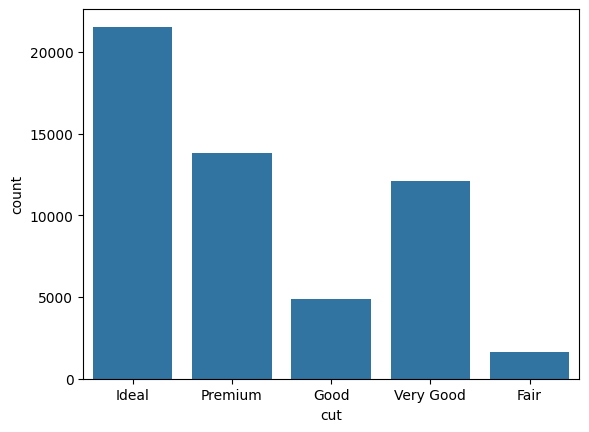

In [34]:
sns.countplot(x='cut',data=diamond)
plt.xlabel='cut'
plt.ylabel='count'
plt.title='Distribution of cut'
plt.show()

In [35]:
diam=diamond[['carat', 'cut', 'color', 'clarity', 'depth', 'table','price', 'x', 'y', 'z']]
diam.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [36]:
diam_dummy=pd.get_dummies(diam,columns=['color','clarity','cut'])
diam_dummy.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [37]:
x=diam_dummy.iloc[:,0:22]
y=diam_dummy.iloc[:,-5:]

In [38]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [39]:
y=np.array(y)

In [40]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.rand(output_size)

    def train(self, X, y, learning_rate=0.1, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):

                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.softmax(z)

                loss = self.cross_entropy_loss(y[i], y_pred)
                gradient_weights, gradient_bias = self.backward(X[i], y[i], y_pred)

                self.weights -= learning_rate * gradient_weights
                self.bias -= learning_rate * gradient_bias

            if (epoch+1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(z)
        return y_pred

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=-1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=-1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-15))

    def backward(self, x, y_true, y_pred):
        gradient_weights = np.outer(x, y_pred - y_true)
        gradient_bias = y_pred - y_true
        return gradient_weights, gradient_bias


In [42]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
perceptron = Perceptron(input_size, output_size)
perceptron.train(X_train, y_train)


Epoch 10/100, Loss: 1.0670060789898477
Epoch 20/100, Loss: 1.0067486575882276
Epoch 30/100, Loss: 1.0006796745924056
Epoch 40/100, Loss: 1.000836263557571
Epoch 50/100, Loss: 1.0040923087732012
Epoch 60/100, Loss: 1.0065032938746827
Epoch 70/100, Loss: 1.008002386769892
Epoch 80/100, Loss: 1.0089253826676206
Epoch 90/100, Loss: 1.0094999831139062
Epoch 100/100, Loss: 1.0098622945569113


In [43]:

y_pred = perceptron.predict(X_test)

accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
print(f'Accuracy: {accuracy}')


Accuracy: 0.5689655172413793


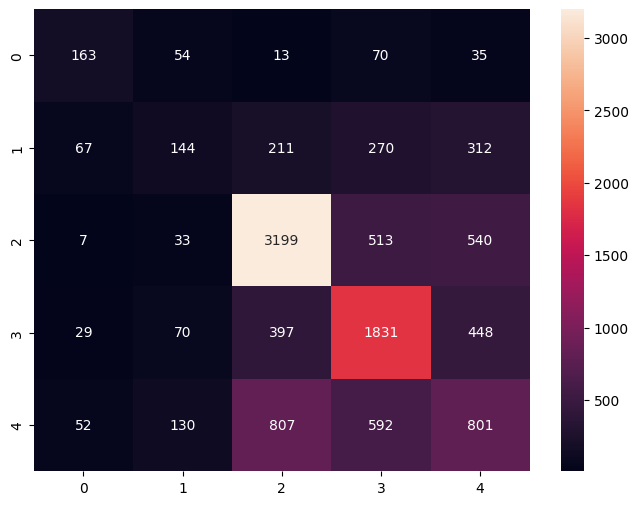

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel=('predicted labels')
plt.ylabel=('true labels')
plt.title=('Confusion Matrix')

In [45]:
report=classification_report(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       335
           1       0.33      0.14      0.20      1004
           2       0.69      0.75      0.72      4292
           3       0.56      0.66      0.61      2775
           4       0.38      0.34      0.35      2382

    accuracy                           0.57     10788
   macro avg       0.49      0.47      0.48     10788
weighted avg       0.55      0.57      0.55     10788



**2. Implement Multi layer Perceptron.**

https://www.kaggle.com/code/androbomb/simple-nn-with-python-multi-layer-perceptron

In [46]:
def softmax(a):
    e_a=np.exp(a)
    ans=e_a/np.sum(e_a,axis=1,keepdims=True)
    return ans

In [47]:
class NN:
    def __init__(self,inp,lay,outp):
        np.random.seed(0)
        model={}

        model['w1']=np.random.randn(inp,lay[0])
        model['b1']=np.zeros((1,lay[0]))

        model['w2']=np.random.randn(lay[0],lay[1])
        model['b2']=np.zeros((1,lay[1]))

        model['w3']=np.random.randn(lay[1],outp)
        model['b3']=np.zeros((1,outp))

        self.model=model

    def forward(self,x):
        z1=np.dot(x,self.model['w1'])+self.model['b1']
        a1=np.tanh(z1)

        z2=np.dot(a1,self.model['w2'])+self.model['b2']
        a2=np.tanh(z2)

        z3=np.dot(a2,self.model['w3'])+self.model['b3']
        y_=softmax(z3)

        self.activation_outputs=(a1,a2,y_)
        return y_
    def backward(self,x,y,l_r=0.01):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        a1,a2,y_=self.activation_outputs

        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)

        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)

        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)

        self.model['w1']-=l_r*dw1/m
        self.model['w2']-=l_r*dw2/m
        self.model['w3']-=l_r*dw3/m

        self.model['b1']-=l_r*db1
        self.model['b2']-=l_r*db2
        self.model['b3']-=l_r*db3
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)

In [48]:
def loss(y_oht,y_):
    l=-np.mean(y_oht*np.log(y_))
    return l;

In [49]:
def train(x,y,model,epochs,l_r,logs=True):
    train_loss=[]
    classes=y.shape[1]
    for ix in range(epochs):
        y_=np.array(model.forward(x))
        l=loss(y,y_)
        model.backward(x,y,l_r)
        train_loss.append(l)
        if(logs):
            print("Epoch %d - loss %.4f"%(ix,l))

    return train_loss

In [50]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model=NN(inp=input_size,outp=output_size,lay=[15,10])

In [51]:
loss=train(X_train,y_train,model,1000,0.01)

Epoch 0 - loss 0.6705
Epoch 1 - loss 0.6687
Epoch 2 - loss 0.6669
Epoch 3 - loss 0.6652
Epoch 4 - loss 0.6634
Epoch 5 - loss 0.6616
Epoch 6 - loss 0.6598
Epoch 7 - loss 0.6581
Epoch 8 - loss 0.6564
Epoch 9 - loss 0.6546
Epoch 10 - loss 0.6529
Epoch 11 - loss 0.6512
Epoch 12 - loss 0.6495
Epoch 13 - loss 0.6478
Epoch 14 - loss 0.6462
Epoch 15 - loss 0.6445
Epoch 16 - loss 0.6428
Epoch 17 - loss 0.6412
Epoch 18 - loss 0.6396
Epoch 19 - loss 0.6379
Epoch 20 - loss 0.6363
Epoch 21 - loss 0.6347
Epoch 22 - loss 0.6331
Epoch 23 - loss 0.6316
Epoch 24 - loss 0.6300
Epoch 25 - loss 0.6284
Epoch 26 - loss 0.6269
Epoch 27 - loss 0.6253
Epoch 28 - loss 0.6238
Epoch 29 - loss 0.6223
Epoch 30 - loss 0.6207
Epoch 31 - loss 0.6192
Epoch 32 - loss 0.6177
Epoch 33 - loss 0.6163
Epoch 34 - loss 0.6148
Epoch 35 - loss 0.6133
Epoch 36 - loss 0.6119
Epoch 37 - loss 0.6104
Epoch 38 - loss 0.6090
Epoch 39 - loss 0.6075
Epoch 40 - loss 0.6061
Epoch 41 - loss 0.6047
Epoch 42 - loss 0.6033
Epoch 43 - loss 0.601

In [52]:
y_pred=model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 0])

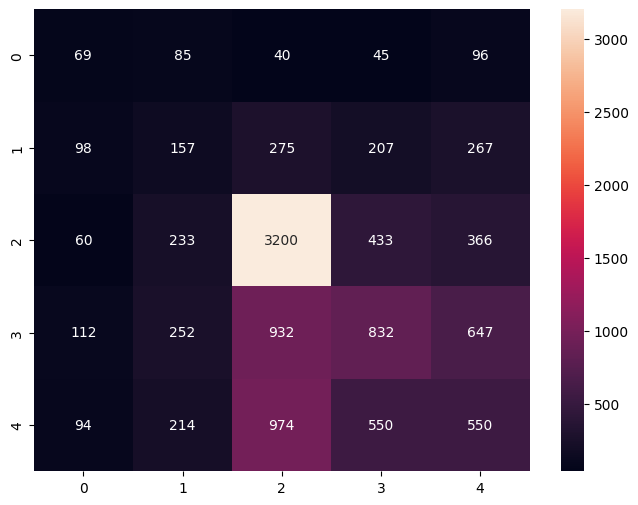

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(np.argmax(y_test, axis=1),y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel=('predicted labels')
plt.ylabel=('true labels')
plt.title=('Confusion Matrix')

In [54]:
report=classification_report(np.argmax(y_test, axis=1),y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.16      0.21      0.18       335
           1       0.17      0.16      0.16      1004
           2       0.59      0.75      0.66      4292
           3       0.40      0.30      0.34      2775
           4       0.29      0.23      0.26      2382

    accuracy                           0.45     10788
   macro avg       0.32      0.33      0.32     10788
weighted avg       0.42      0.45      0.43     10788

